### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [5]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('marketing_campaign.csv', sep='\t')

Saving marketing_campaign.csv to marketing_campaign (2).csv


In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_wine, load_iris
import seaborn as sns

pd.set_option('float_format', '{:.2f}'.format)

In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


In [10]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
print(df["Income"].isna().mean() * 100)  # Percentage of missing values

1.0714285714285714


In [12]:
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.95)
IQR = Q3 - Q1
print(IQR)

Min_value2 = (Q1 - 1.5 * IQR)
Max_value2 = (Q3 + 1.5 * IQR)
print("Minimum value up to which there are outliers: {}".format(Min_value2))
print("Maximum value after which there are outliers: {}".format(Max_value2))

48827.0
Minimum value up to which there are outliers: -37937.5
Maximum value after which there are outliers: 157370.5


**Спостереження:**

Маємо 2240 рядків та 29 колонок. 25 з ніх числові. Стовбчик Income - 24 NaN (що складає 1%).

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [13]:
df['Income'].fillna(df['Income'].median(), inplace=True)

/tmp/ipython-input-1959487941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


**Спостереження:**

Для невеликої частки, що складає у нашому випадку 1% пропущених значень в колонці з залишками, більш за все підійде заповнення **медіаною**.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [14]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [15]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [16]:
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y') # Дата реєстрації

Для збереження порядкової інформації використуємо OrdinalEncoder для ознаки Education та Marital_Status.

In [17]:
from sklearn.preprocessing import OrdinalEncoder

education_categories = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

encoder = OrdinalEncoder(categories=[education_categories])

# Fit and transform the 'Education' column
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

# Drop the original 'Education' column (optional)
df = df.drop('Education', axis=1)

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for a dense array

encoded_data = encoder.fit_transform(df[['Marital_Status']])

feature_names = encoder.get_feature_names_out(['Marital_Status'])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'Marital_Status' column
df = df.drop('Marital_Status', axis=1)

In [19]:
from datetime import datetime

# Calculate customer tenure in days
df['CustomerTenure'] = (datetime.now() - df['Dt_Customer']).dt.days

# Extract the year the customer joined
df['YearJoined'] = df['Dt_Customer'].dt.year

# Extract the month the customer joined
df['MonthJoined'] = df['Dt_Customer'].dt.month

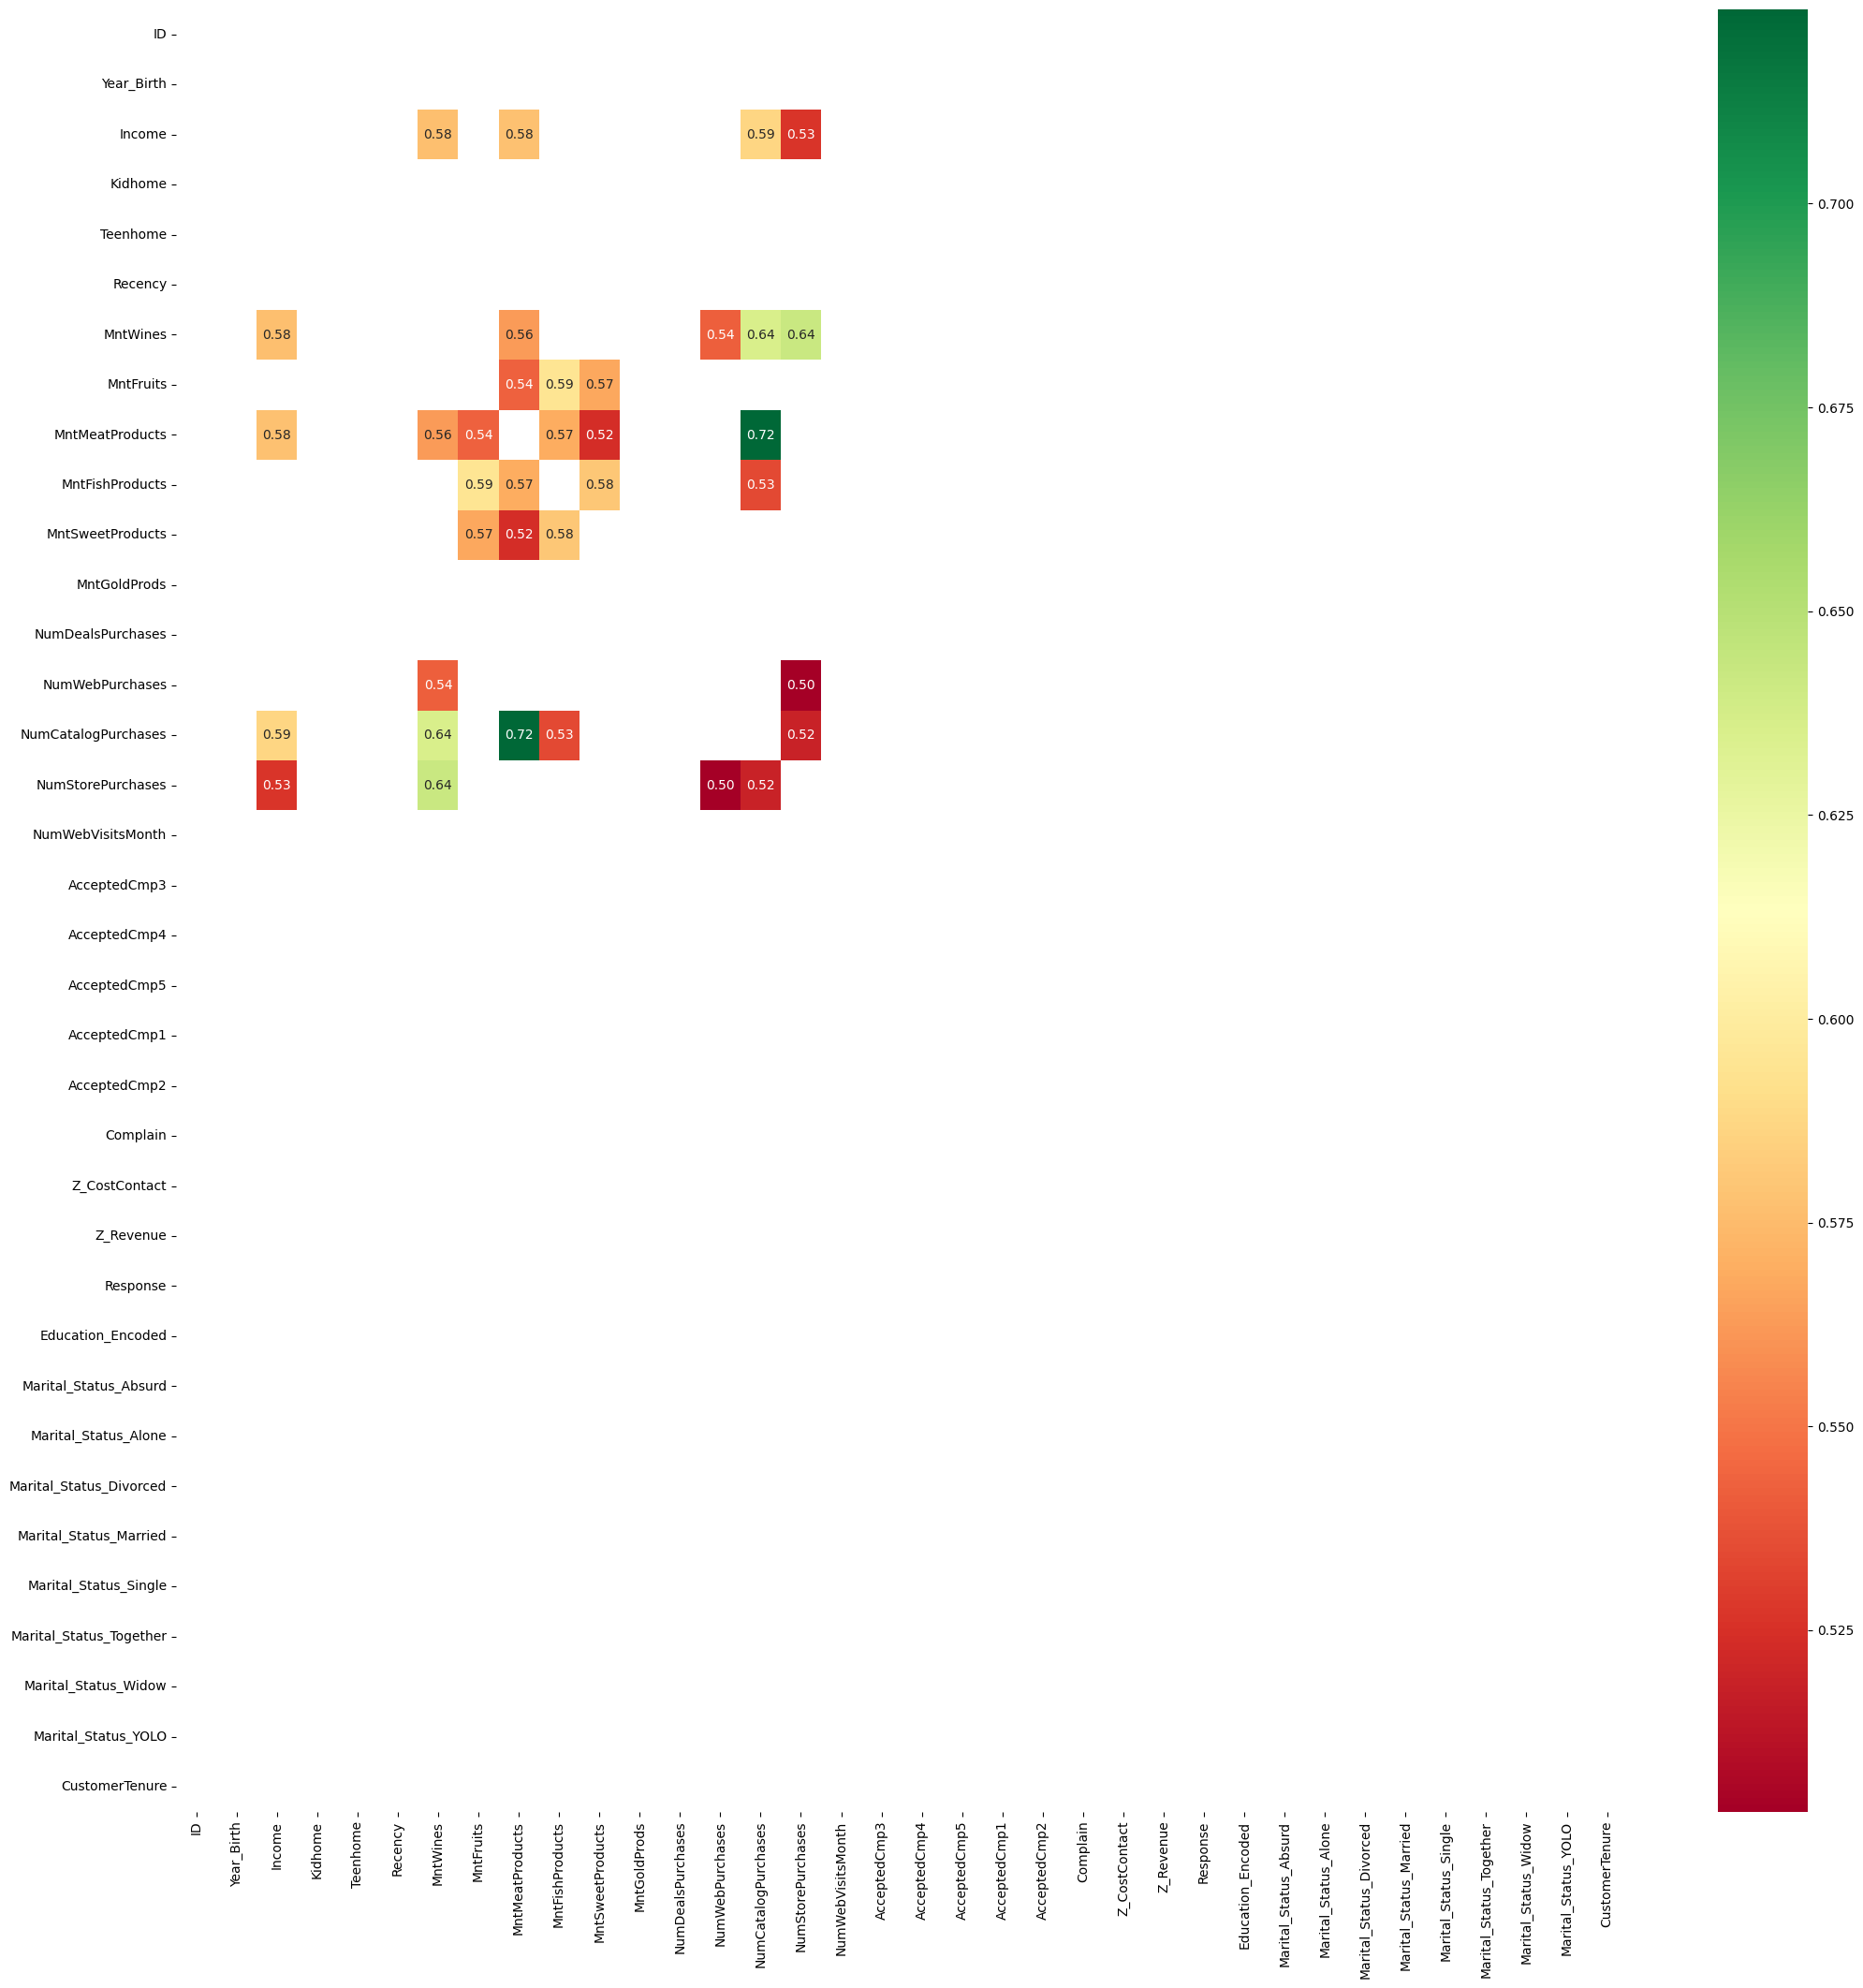

In [21]:
corr_df = df.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df[(corr_df >= 0.5) & (corr_df < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_Encoded', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'CustomerTenure',
       'YearJoined', 'MonthJoined'],
      dtype='object')

In [23]:
features = ['Year_Birth', 'Income', 'Kidhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Encoded', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'CustomerTenure']
X = df[features]

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 1 0 ... 0 0 0]


In [26]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the Dataset Clusters: 0.60


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [29]:
import plotly.express as px

fig = px.scatter_3d(
    X,
    x='NumStorePurchases',
    y='Income',
    z='NumWebPurchases',
    color=labels.astype(str),  # щоб легенда показувала номери кластерів
    opacity=0.7,
    title='3D Scatter Plot: Customer Segmentation by Purchases and Income',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(
    scene=dict(
        xaxis_title='Store Purchases',
        yaxis_title='Income',
        zaxis_title='Web Purchases'
    ),
    legend_title_text='Cluster'
)
fig.show()

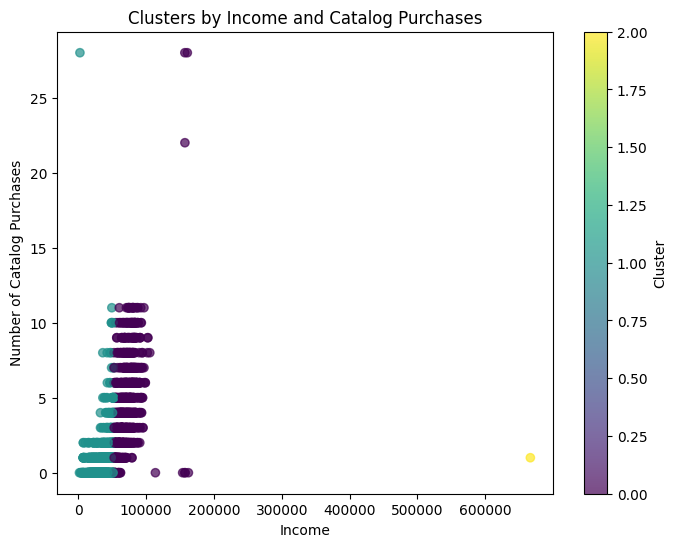

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    X['Income'], X['NumCatalogPurchases'],
    c=labels, cmap='viridis', alpha=0.7
)
plt.xlabel('Income')
plt.ylabel('Number of Catalog Purchases')
plt.title('Clusters by Income and Catalog Purchases')
plt.colorbar(label='Cluster')
plt.show()

**Спостереження:**

Після виконання кластеризації за допомогою KMeans (k=3) було отримано три чіткі групи клієнтів.
Для візуалізації використано ознаки Income, NumStorePurchases та NumWebPurchases, оскільки вони добре відображають поведінку споживачів і рівень їхньої купівельної спроможності.

* Кластер 0 — низький дохід, низька активність
Низький рівень доходу.
Невелика кількість покупок як онлайн, так і в магазині.
Ймовірно, це економні клієнти або ті, що рідко взаємодіють з брендом.
Можуть бути чутливими до знижок і акцій.
* Кластер 1 — середній дохід, середня активність
Середній рівень доходу.
Регулярно здійснюють покупки, але без вираженої активності.
Це основна клієнтська база, яка забезпечує стабільні продажі.
Рекомендація: підтримувати інтерес через персоналізовані пропозиції.

* Кластер 2 — високий дохід, висока активність
Найвищий рівень доходу.
Найактивніше купують як у фізичних магазинах, так і через веб.
Це лояльні та прибуткові клієнти, цінні для компанії.
Рекомендація: преміальні пропозиції, програми лояльності, early-access акції.


Візуалізація у 3D-просторі показує, що кластери мають логічну інтерпретацію — дохід клієнта прямо пов’язаний з частотою його покупок. Така кластеризація може бути використана для таргетованого маркетингу та персоналізації комунікацій з різними групами користувачів.


**Завдання 6**. Масштабуйте дані (StandardScaler/MinMaxScaler) і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X)

# Create a DataFrame from the scaled data with original column names
scaled_df = pd.DataFrame(scaled_data, columns=features, index=X.index)

X_s = scaled_df[features]

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_s)

labels = kmeans.predict(X_s)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_s, labels, metric='euclidean')
print(f'Silhouette Coefficient for the Dataset Clusters: {s:.2f}')

[1 0 2 ... 2 2 0]
Silhouette Coefficient for the Dataset Clusters: 0.15


**Спостереження:**

Якість виросла значно після масштабування даних.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [34]:
import numpy as np
import scipy.stats as stats

def find_columns_with_outliers_iqr(data):
    """
    Finds columns in a DataFrame that have outliers using the IQR method.

    Args:
        data: Pandas DataFrame.

    Returns:
        A list of column names with outliers.
    """
    columns_with_outliers = []
    for column in data.select_dtypes(include=np.number):  # Iterate over numerical columns
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if data[(data[column] < lower_bound) | (data[column] > upper_bound)].any(axis=None):
            columns_with_outliers.append(column)
    return columns_with_outliers

# Example usage:
columns_with_outliers = find_columns_with_outliers_iqr(df)
print(f"Columns with outliers (IQR method): {columns_with_outliers}")

Columns with outliers (IQR method): ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Education_Encoded', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Single', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'YearJoined']


/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

/tmp/ipython-input-682707252.py:21: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a futur

In [35]:
out_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', ]

In [36]:
df[out_features].describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,52237.98,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.32
std,25037.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,2.43
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,35538.75,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00
50%,51381.50,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,6.00
75%,68289.75,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,7.00
max,666666.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,20.00


In [37]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.99)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return print(Min_value, Max_value)

In [38]:
outlier_range(df, "Income")

-52809.64500000002 182786.075


In [39]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Initialize
df_filtered = df.copy()

# Remove outliers from specified columns
for column in ['Income']:
    df_filtered = remove_outliers_iqr(df_filtered, column)

df = df_filtered

In [40]:
# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[['Income']]) # Reshape to 2D using double brackets

# Create a DataFrame from the scaled data with original column names
scaled_df = pd.DataFrame(scaled_data, columns=['Income'], index=df.index) # Correct column name

# Update the 'Income' column in your feature set
X_s['Income'] = scaled_df['Income']

In [41]:
X_s['Income'].fillna(X_s['Income'].median(), inplace=True)

/tmp/ipython-input-2606865928.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Спостереження:**

Великі викиди є тільки в колонці Income, їх видаляємо. Інші дані можут містити інформативні показники.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

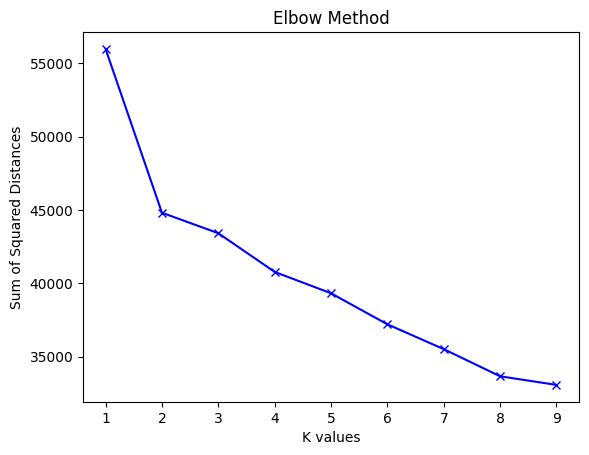

In [42]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_s)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X_s)

labels = kmeans.predict(X_s)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_s, labels, metric='euclidean')
print(f'Silhouette Coefficient for the Dataset Clusters: {s:.2f}')

[0 1 0 ... 0 0 1]
Silhouette Coefficient for the Dataset Clusters: 0.22


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, n_init='auto')
kmeans.fit(X_s)

labels = kmeans.predict(X_s)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_s, labels, metric='euclidean')
print(f'Silhouette Coefficient for the Dataset Clusters: {s:.2f}')

[2 3 0 ... 0 1 3]
Silhouette Coefficient for the Dataset Clusters: 0.09


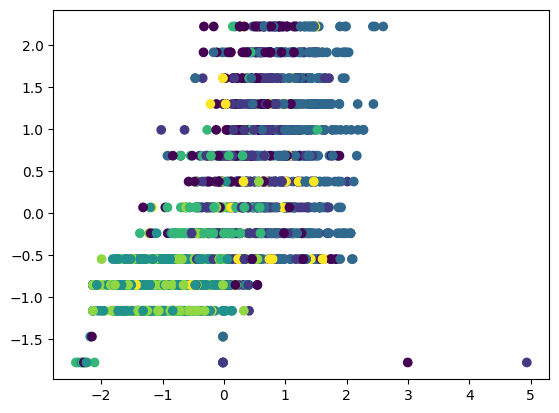

In [46]:
plt.scatter(X_s['Income'], X_s['NumStorePurchases'], c=labels)
plt.show()

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [47]:
X = df[features]

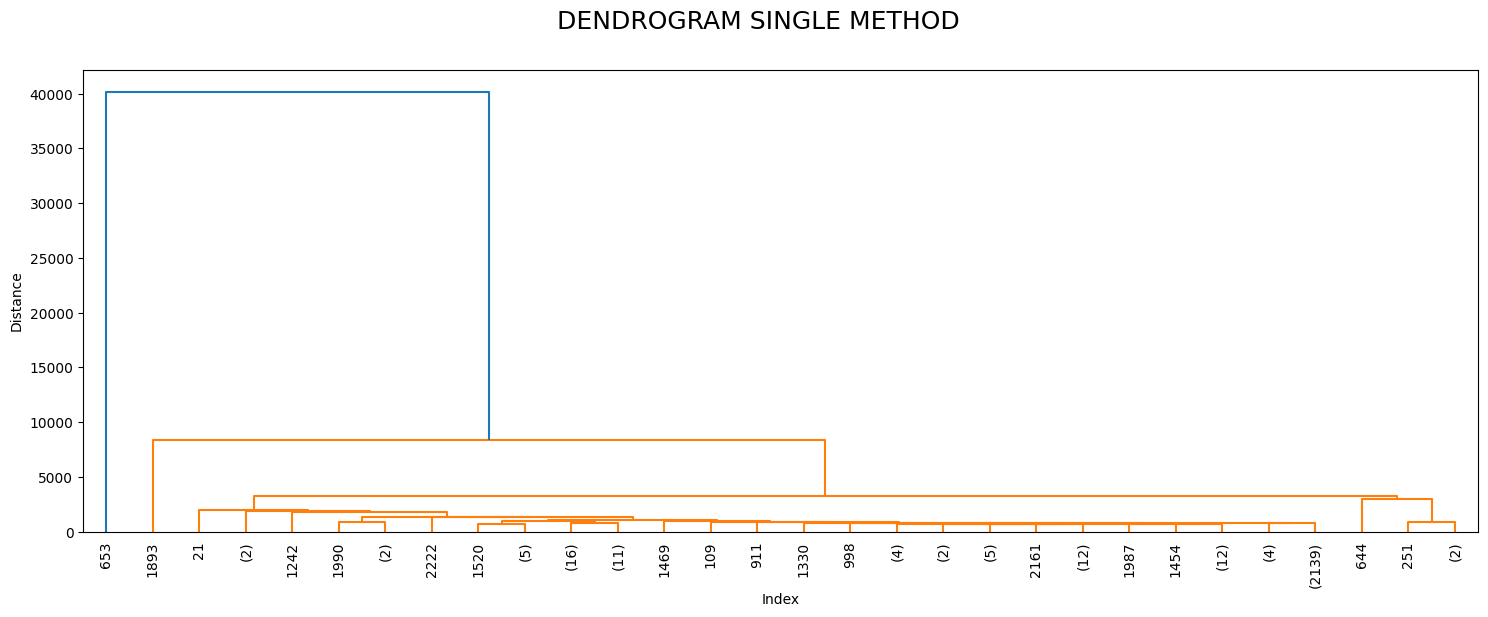

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [54]:
X['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

# Add the cluster labels to the original DataFrame
df['2_clust'] = X['2_clust']
df['3_clust'] = X['3_clust']

/tmp/ipython-input-1046980019.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1046980019.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
from sklearn.metrics import silhouette_score

# Get cluster labels using fcluster
labels = X['2_clust']

# Calculate Silhouette Score
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for Single Linkage Clustering: {s:.2f}')

Silhouette Coefficient for Single Linkage Clustering: 0.75


In [51]:
from sklearn.metrics import silhouette_score

# Get cluster labels using fcluster
labels = X['3_clust']

# Calculate Silhouette Score
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for Single Linkage Clustering: {s:.2f}')

Silhouette Coefficient for Single Linkage Clustering: 0.56


<Axes: title={'center': 'K = 3'}, xlabel='NumWebPurchases', ylabel='Income'>

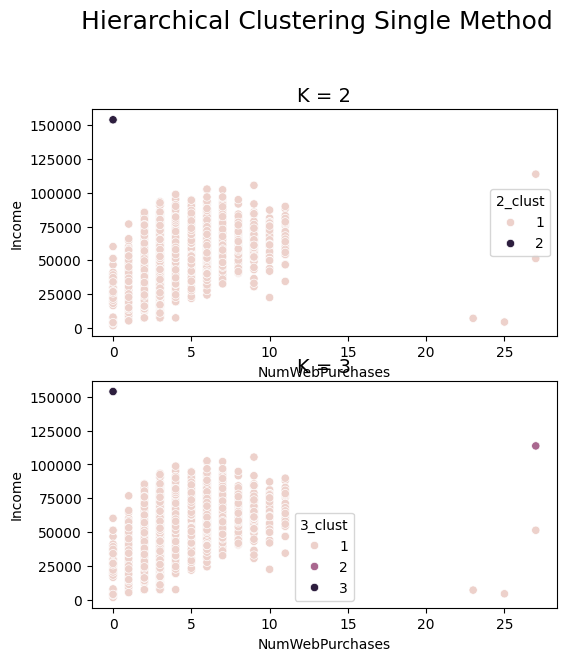

In [55]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="NumWebPurchases",y="Income", data=df, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="NumWebPurchases",y="Income", data=df, hue="3_clust")

**Спостереження:**

Найкраще значення силуетного коефіцієнта спостерігається при трьох кластерах, однак візуально дані не формують чітких груп. Метод single linkage виявився нечутливим до реальної структури даних — з’являються ізольовані точки та залишкові кластери. Залишки не видалялися, щоб не спотворювати оцінку якості кластеризації.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

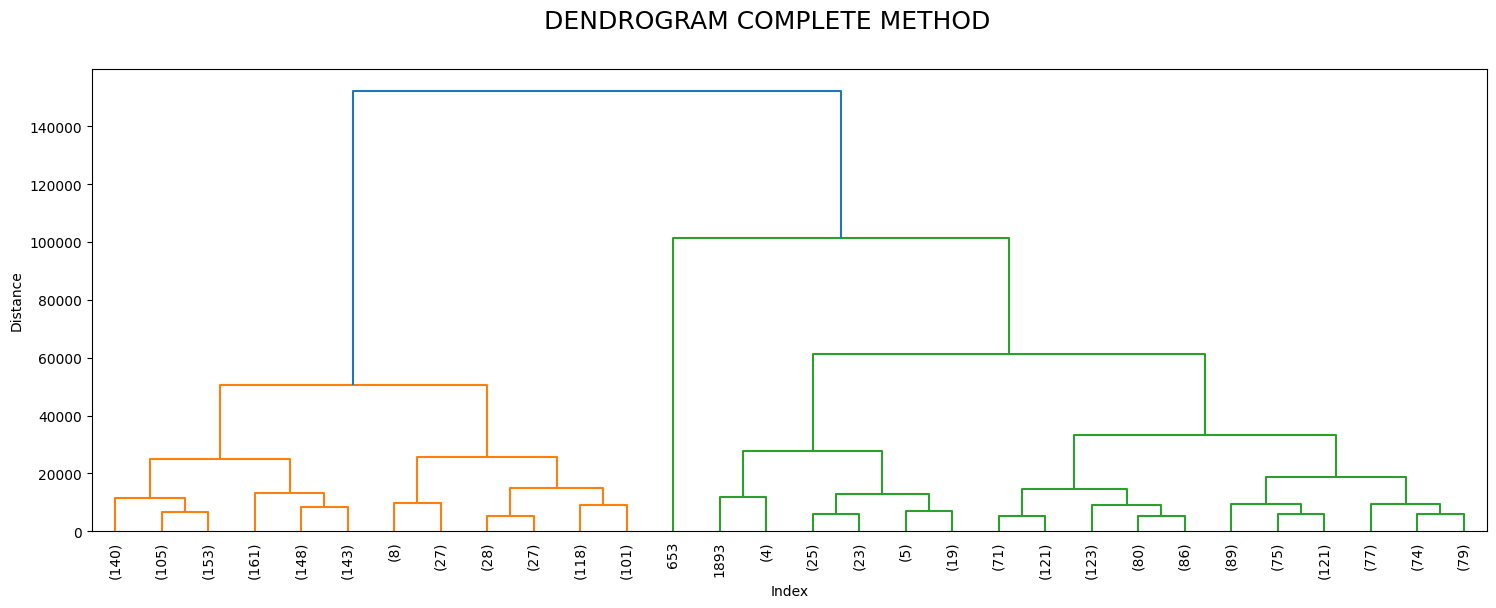

In [56]:
dist_comp = linkage(X, method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

In [57]:
df['2_clust_CM']=fcluster(dist_comp, 2, criterion='maxclust')
df['3_clust_CM']=fcluster(dist_comp, 3, criterion='maxclust')
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,CustomerTenure,YearJoined,MonthJoined,2_clust,3_clust,2_clust_CM,3_clust_CM
0,5524,1957,58138.00,0,0,2012-09-04,58,635,88,546,...,0.00,0.00,0.00,4786,2012,9,1,1,2,2
1,2174,1954,46344.00,1,1,2014-03-08,38,11,1,6,...,0.00,0.00,0.00,4236,2014,3,1,1,1,1
2,4141,1965,71613.00,0,0,2013-08-21,26,426,49,127,...,1.00,0.00,0.00,4435,2013,8,1,1,2,2
3,6182,1984,26646.00,1,0,2014-02-10,26,11,4,20,...,1.00,0.00,0.00,4262,2014,2,1,1,1,1
4,5324,1981,58293.00,1,0,2014-01-19,94,173,43,118,...,0.00,0.00,0.00,4284,2014,1,1,1,2,2


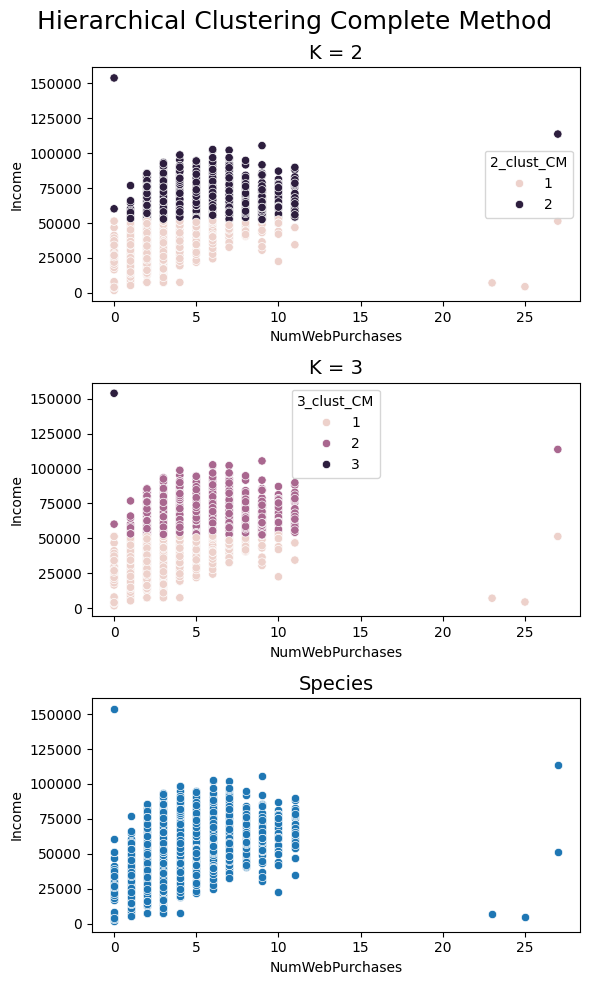

In [58]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="NumWebPurchases",y="Income", data=df, hue="2_clust_CM")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="NumWebPurchases",y="Income", data=df, hue="3_clust_CM")

plt.subplot(3,1,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="NumWebPurchases",y="Income", data=df)
plt.tight_layout();

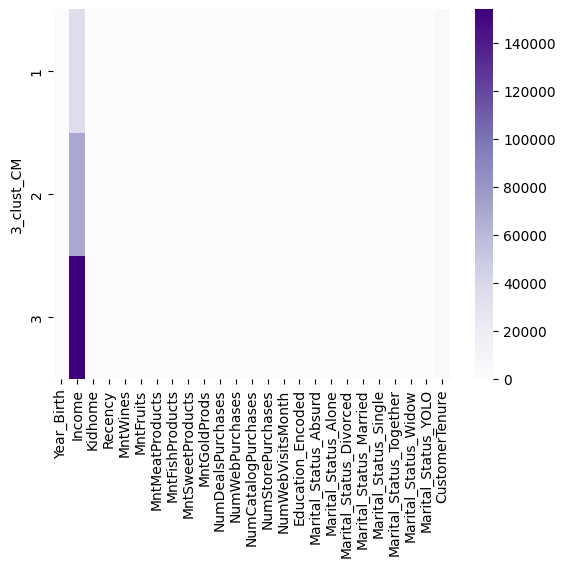

In [59]:
filter_col_names = features + ['3_clust_CM']
sns.heatmap(df[filter_col_names].groupby(['3_clust_CM']).mean(), cmap="Purples");

**Спостереження:**

Ієрархічна агломеративна кластеризація з методом Complete linkage найкраще розділила клієнтів за рівнем прибутку — утворилися логічні групи з низьким, середнім та високим доходом. Метод показав найкращий результат серед протестованих, однак варто ще поекспериментувати з вибором ознак для покращення точності кластеризації.



**Загальні спостереження:**

Під час проведення кластеризації клієнтів було протестовано кілька методів:
* KMeans
* ієрархічну кластеризацію (Single linkage)
* ієрархічну кластеризацію (Complete linkage).

Отож,
KMeans показав чітке розділення клієнтів за рівнем доходу та активністю покупок. Кластери мають логічну інтерпретацію: низький, середній та високий рівень доходу відповідно до кількості покупок.

Single linkage формально дав найкращий силует при трьох кластерах, але дані не утворюють чітких груп, з’являються ізольовані точки та залишкові кластери. Метод виявився менш ефективним для цієї задачі.

Complete linkage найкраще розділив клієнтів за рівнем прибутку, чітко виділяються групи з низьким, середнім і високим доходом. Результат є логічним, але варто ще експериментувати з вибором ознак для покращення точності.

Загалом найстабільніші та найінтерпретованіші результати показали методи KMeans і Complete linkage, тоді як Single linkage виявився менш придатним через нечітке розділення даних.
